## Comparing the representational similarity of objects in human visual systems and deep convolutional neural networks

In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import scipy, os
import rsatoolbox as rsa 

%matplotlib inline 

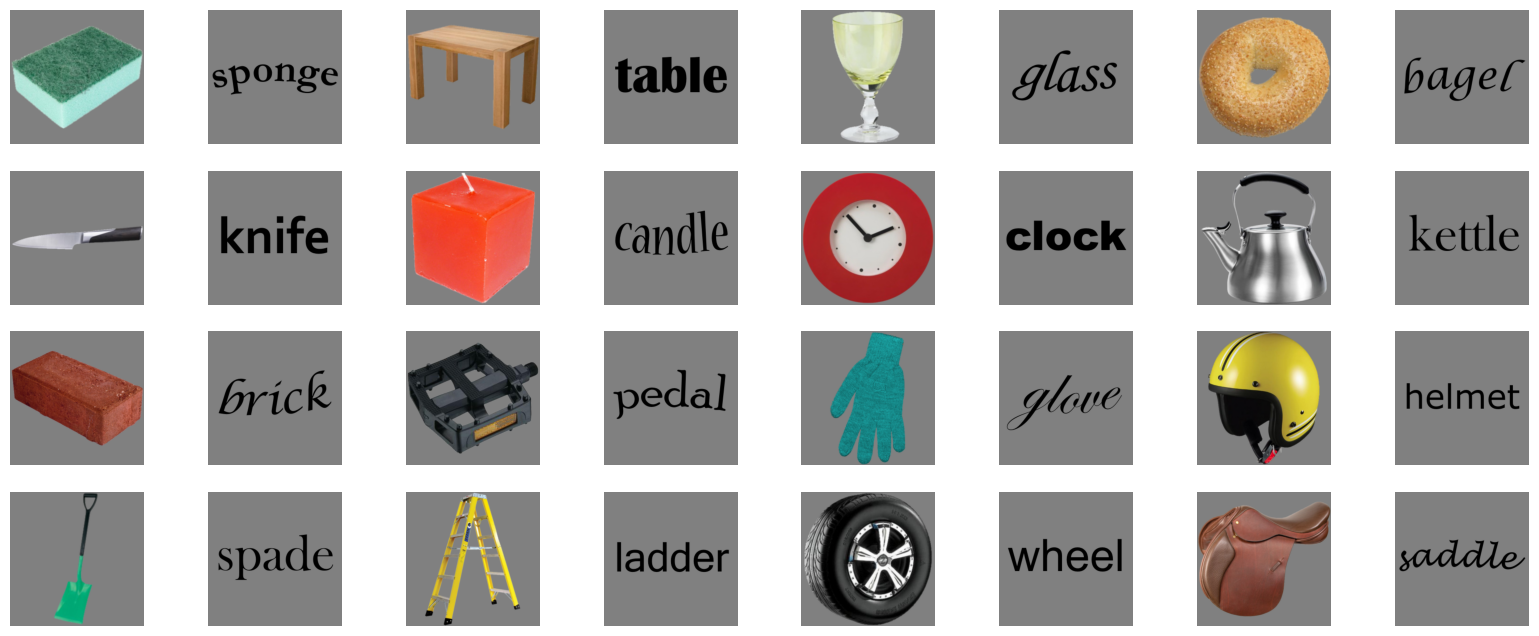

In [2]:
# showing all the stimuli

file_names = ['ScreenShot339_masked_rs.bmp',    'sponge.bmp',   'ScreenShot350_masked_rs.bmp',  'table.bmp',    'ScreenShot308_masked_rs.bmp',  'glass.bmp',    'ScreenShot175_masked_rs.bmp',  'bagel.bmp', 
              'ScreenShot351_masked_rs.bmp',    'knife.bmp',    'ScreenShot344_masked_rs.bmp',  'candle.bmp',   'ScreenShot304_masked_rs.bmp',  'clock.bmp',    'ScreenShot317_masked_rs.bmp',  'kettle.bmp',
              'ScreenShot343_masked_rs.bmp',    'brick.bmp',    'ScreenShot353_masked_rs.bmp',  'pedal.bmp',    'ScreenShot287_masked_rs.bmp',  'glove.bmp',    'ScreenShot338_masked_rs.bmp',  'helmet.bmp',
              'ScreenShot207_masked_rs.bmp',    'spade.bmp',    'ScreenShot195_masked_rs.bmp',  'ladder.bmp',   'ScreenShot241_masked_rs.bmp',  'wheel.bmp',    'ScreenShot279_masked_rs.bmp',  'saddle.bmp']
n_stimuli = len(file_names)

fig, axs = plt.subplots(4, 8, figsize=(20, 8))

for i in np.arange(len(file_names)):
    img = plt.imread(os.path.join('stimuli', file_names[i]))
    axs.ravel()[i].imshow(img) 
    axs.ravel()[i].set_axis_off() 

In [3]:
MAT_RDMs_neural_data = os.path.join('deepNets', 'RDMs_neural_data.mat')
RDMs_neural = scipy.io.loadmat(MAT_RDMs_neural_data)
RDMs_neural.keys()

dict_keys(['__header__', '__version__', '__globals__', 'RDMs_subjAvg_region', 'RDMs_subj_region', 'ROInames'])

In [4]:
ROI_names = [''.join(x) for x in RDMs_neural['ROInames'][0]]
n_ROIs = len(ROI_names)
ROI_names

['V1', 'V2', 'V3', 'V4', 'IT', 'IPS', 'IFJ']

In [5]:
RDMs_neural['RDMs_subjAvg_region'].shape

(128, 128, 7)

In [6]:
RDMs_neural['RDMs_subjAvg_region'] = np.transpose(RDMs_neural['RDMs_subjAvg_region'], (2, 0, 1))
RDMs_neural['RDMs_subjAvg_region'] = RDMs_neural['RDMs_subjAvg_region'][:, 0:n_stimuli, 0:n_stimuli]
RDMs_neural['RDMs_subjAvg_region'].shape

(7, 32, 32)

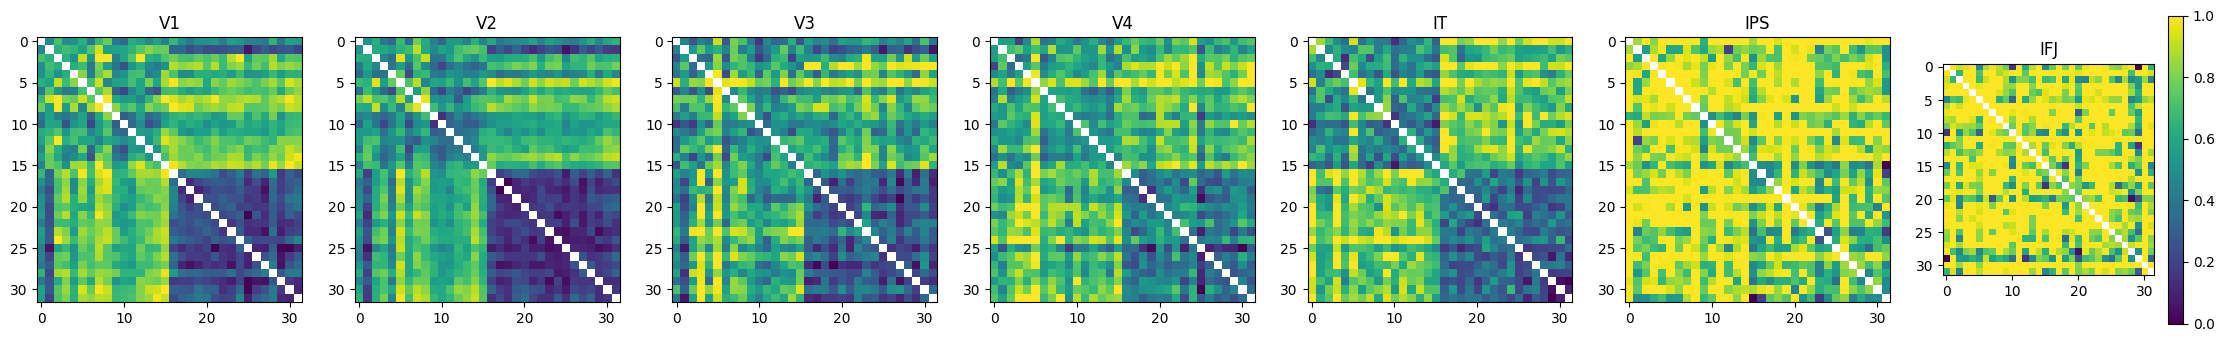

In [7]:
# showing the average RDMs across subjects (32 stimuli x 4 tasks = 128 task conditions)
fig, axs = plt.subplots(1, 7, figsize=(28, 4))

for i in np.arange(n_ROIs):
    rdm = RDMs_neural['RDMs_subjAvg_region'][i]
    rdm = (rdm - np.nanmin(rdm)) / np.nanmax(rdm) 
    im = axs[i].imshow(rdm, cmap='viridis', vmin=0, vmax=1)
    axs[i].set_title(ROI_names[i])
    if i == n_ROIs - 1:
        plt.colorbar(im, ax=axs[i])

In [8]:
MAT_RDMs_alexnet = os.path.join('deepNets', 'RDMs_alexnet.mat')
RDMs_alexnet_saved = scipy.io.loadmat(MAT_RDMs_alexnet)
RDMs_alexnet_saved.keys()

dict_keys(['__header__', '__version__', '__globals__', 'cnnRDM'])

In [9]:
RDMs_alexnet = {}

for layer in RDMs_alexnet_saved['cnnRDM'][0]:    
    RDMs_alexnet[''.join(layer[1])] = scipy.spatial.distance.squareform(layer[0].flatten(), 'tomatrix')    

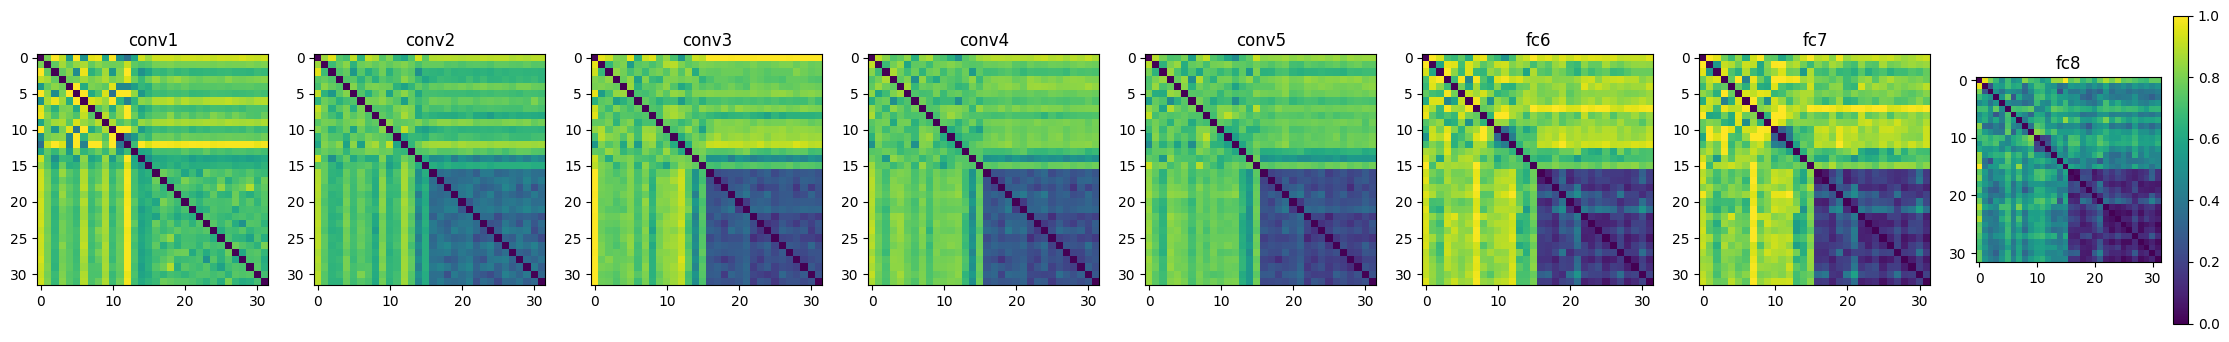

In [10]:
# plot the RDMs for each layer of alexnet 
n_layers = len(RDMs_alexnet)
layer_names = list(RDMs_alexnet.keys())

fig, axs = plt.subplots(1, n_layers, figsize=(28, 4))

for i in np.arange(n_layers):
    rdm = RDMs_alexnet[layer_names[i]]
    im = axs[i].imshow(rdm, cmap='viridis', vmin=0, vmax=1)
    axs[i].set_title(layer_names[i])
    if i == n_layers - 1:
        plt.colorbar(im, ax=axs[i])

In [11]:
RDMs_neural['RDMs_subj_region'].shape

(128, 128, 14, 7)

In [12]:
RDMs_neural['RDMs_subj_region'] = np.transpose(RDMs_neural['RDMs_subj_region'], (2, 3, 0, 1)) 
RDMs_neural['RDMs_subj_region'] = RDMs_neural['RDMs_subj_region'][:, :, 0:n_stimuli, 0:n_stimuli]
RDMs_neural['RDMs_subj_region'].shape

(14, 7, 32, 32)

In [13]:
# model RDMs
models = []
for i in np.arange(n_layers):
    models.append(rsa.model.model.ModelFixed(layer_names[i], RDMs_alexnet[layer_names[i]]))

models 

In [14]:
models[0].rdm.shape 

(496,)

/var/folders/hv/x8n5hv816wl3ld__pv8x18vm0000gn/T/ipykernel_22697/1896735962.py:33: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x, np.zeros(x.shape), c=[1, 1, 1])
/var/folders/hv/x8n5hv816wl3ld__pv8x18vm0000gn/T/ipykernel_22697/1896735962.py:33: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x, np.zeros(x.shape), c=[1, 1, 1])
/var/folders/hv/x8n5hv816wl3ld__pv8x18vm0000gn/T/ipykernel_22697/1896735962.

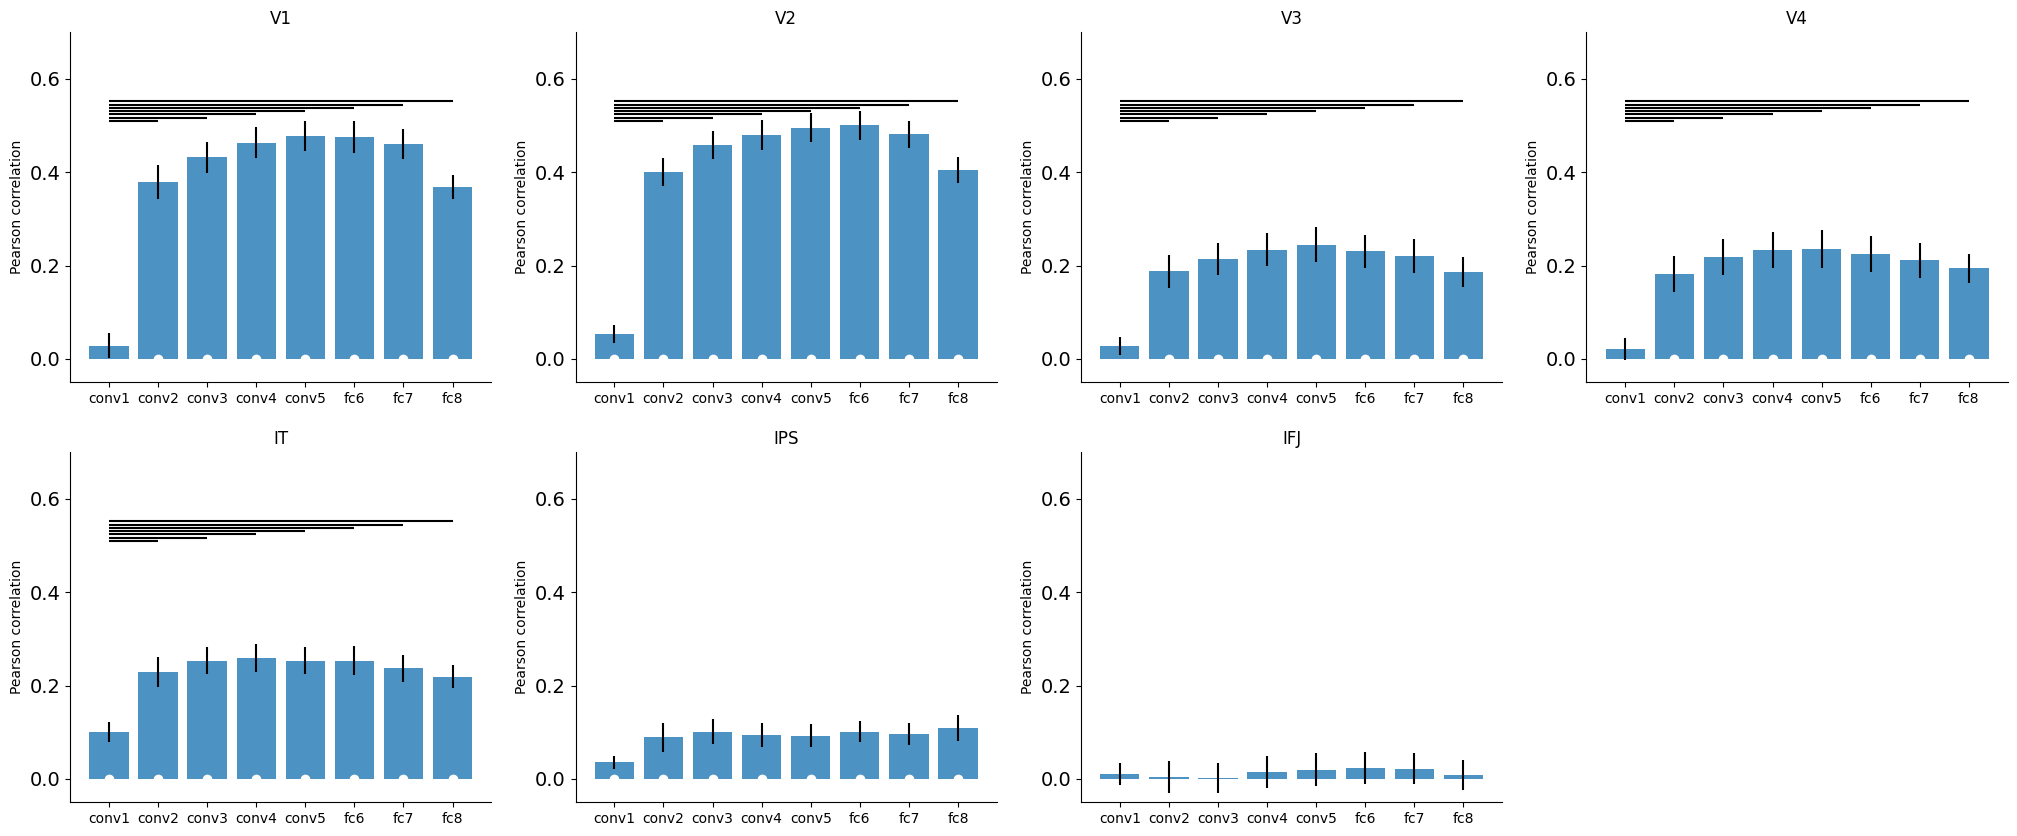

In [35]:
output = {}
significance_level = 0.05 

fig, ax = plt.subplots(2, 4, figsize=(25, 10))

for roiI in np.arange(n_ROIs):
    dataRDMs = rsa.rdm.rdms.RDMs(RDMs_neural['RDMs_subj_region'][:, roiI, :, :].squeeze())
    train_set, test_set, ceil_set = rsa.inference.sets_leave_one_out_rdm(dataRDMs)
    results = rsa.inference.crossval(models, dataRDMs, train_set, test_set, ceil_set=ceil_set, method='corr')
    
    evaluations = results.evaluations.squeeze()
    means = evaluations.mean(axis=1)
    stes = evaluations.std(axis=1)/np.sqrt(evaluations.shape[1])

    plt.axes(ax.ravel()[roiI])
    ax.ravel()[roiI].bar(np.arange(n_layers), means, yerr=stes, alpha=0.8)
    ax.ravel()[roiI].set_ylabel('Pearson correlation')
    ax.ravel()[roiI].set_yticks(np.arange(0, 0.7, 0.2))
    ax.ravel()[roiI].set_xticks(np.arange(n_layers))
    ax.ravel()[roiI].set_xticklabels(layer_names)
    ax.ravel()[roiI].set_title(f'{ROI_names[roiI]}')
    ax.ravel()[roiI].set_ylim([-0.05, 0.7])
    ax.ravel()[roiI].spines['top'].set_visible(False)
    ax.ravel()[roiI].spines['right'].set_visible(False)

    # test if model performance is significantly higher than 0
    t_result = scipy.stats.ttest_ind(evaluations, np.zeros(evaluations.shape), equal_var=False, axis=1, alternative='greater')
    output['t_zero'] = t_result
    pvalues = t_result[1]
    pvalues = scipy.stats.false_discovery_control(pvalues)
    is_significant = pvalues <= significance_level
    x = np.where(is_significant)[0]
    plt.scatter(x, np.zeros(x.shape), c=[1, 1, 1])

    # pair-wise model comparisons
    pairwise_comparison_result = []
    pvalues = []
    for i in np.arange(n_layers - 1):
        for j in np.arange(i + 1, n_layers):
            t_result = scipy.stats.ttest_ind(evaluations[i, :], evaluations[j, :], alternative='two-sided')
            pairwise_comparison_result.append(t_result)
            pvalues.append(t_result[1])
    output['t_pairwise'] = pairwise_comparison_result
    pvalues = np.array(pvalues)
    pvalues = scipy.stats.false_discovery_control(pvalues)
    is_significant = pvalues <= significance_level
    pointer = 0
    n_pairs = len(pairwise_comparison_result)
    y_start = 0.51
    y_end = 0.7
    y_steps = np.linspace(y_start, y_end, num=n_pairs)
    y_selected = []
    x_selected = []
    for i in np.arange(n_layers - 1):
        for j in np.arange(i + 1, n_layers):
            if is_significant[pointer]:
                y_selected.append(y_steps[pointer])
                x_selected.append((i, j))
            pointer += 1
    n_selected = len(x_selected)
    if n_selected > 0:
        for i in np.arange(n_selected):
            ax.ravel()[roiI].hlines(y=y_selected[i], xmin=x_selected[i][0], xmax=x_selected[i][1], color='k')

    # rsa.vis.plot_model_comparison(results_cv)
    
    # results = rsa.inference.eval_fixed(models, dataRDMs, method='corr')
    # rsa.vis.plot_model_comparison(results)
    
    # plt.title(ROI_names[roiI])

ax.ravel()[7].set_visible(False)

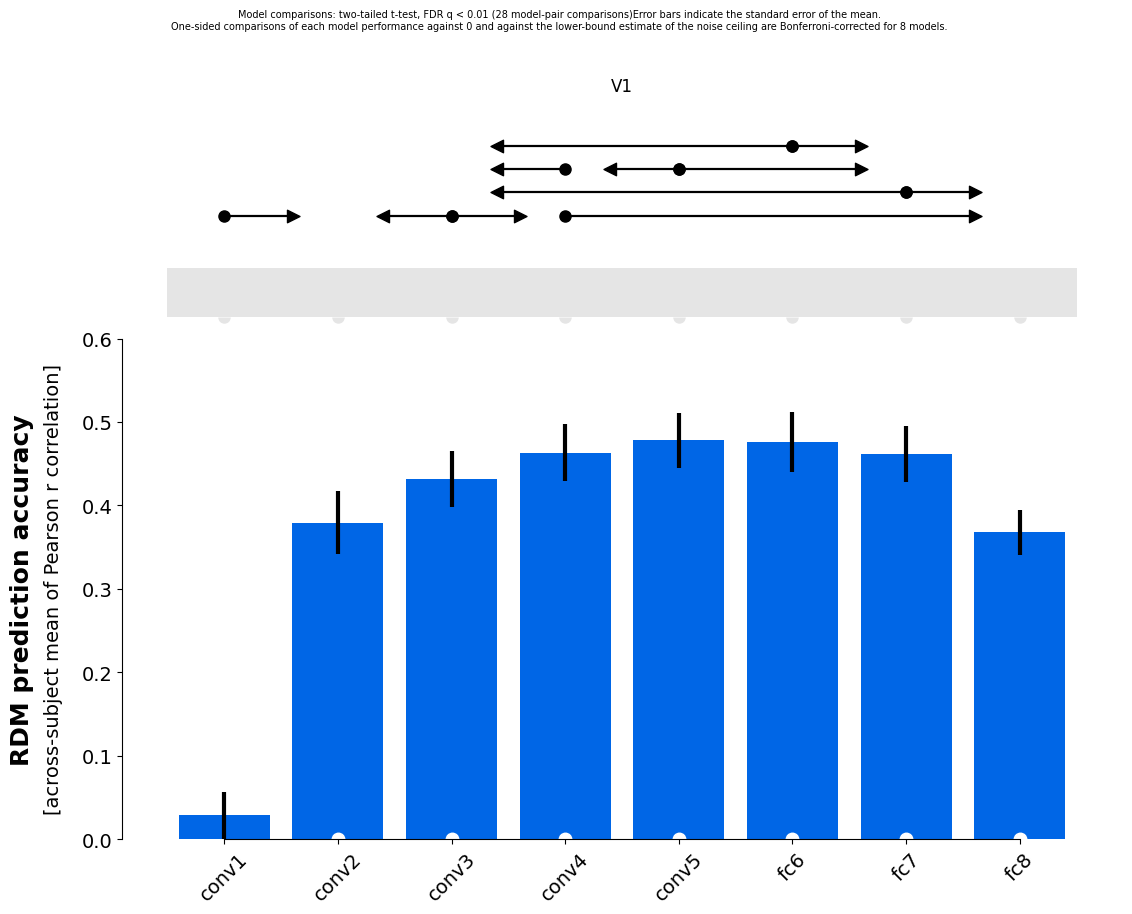

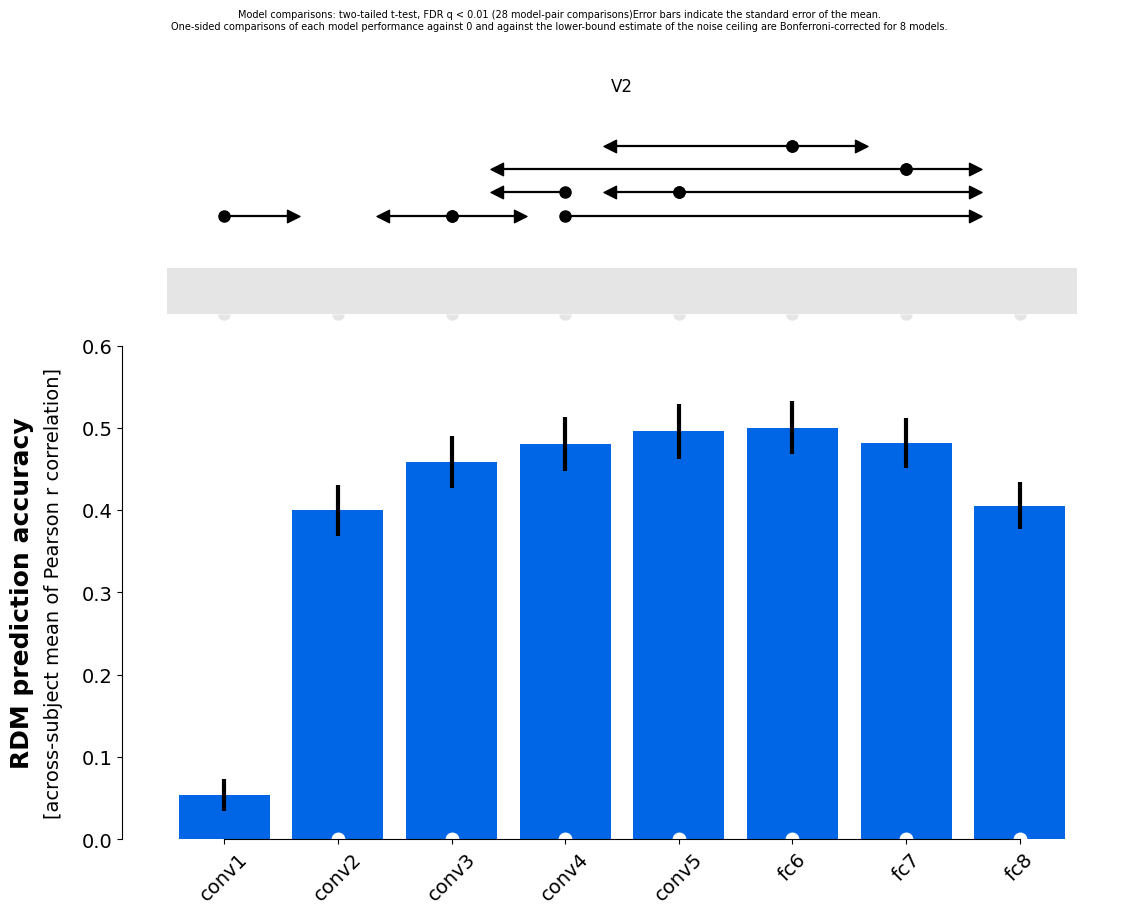

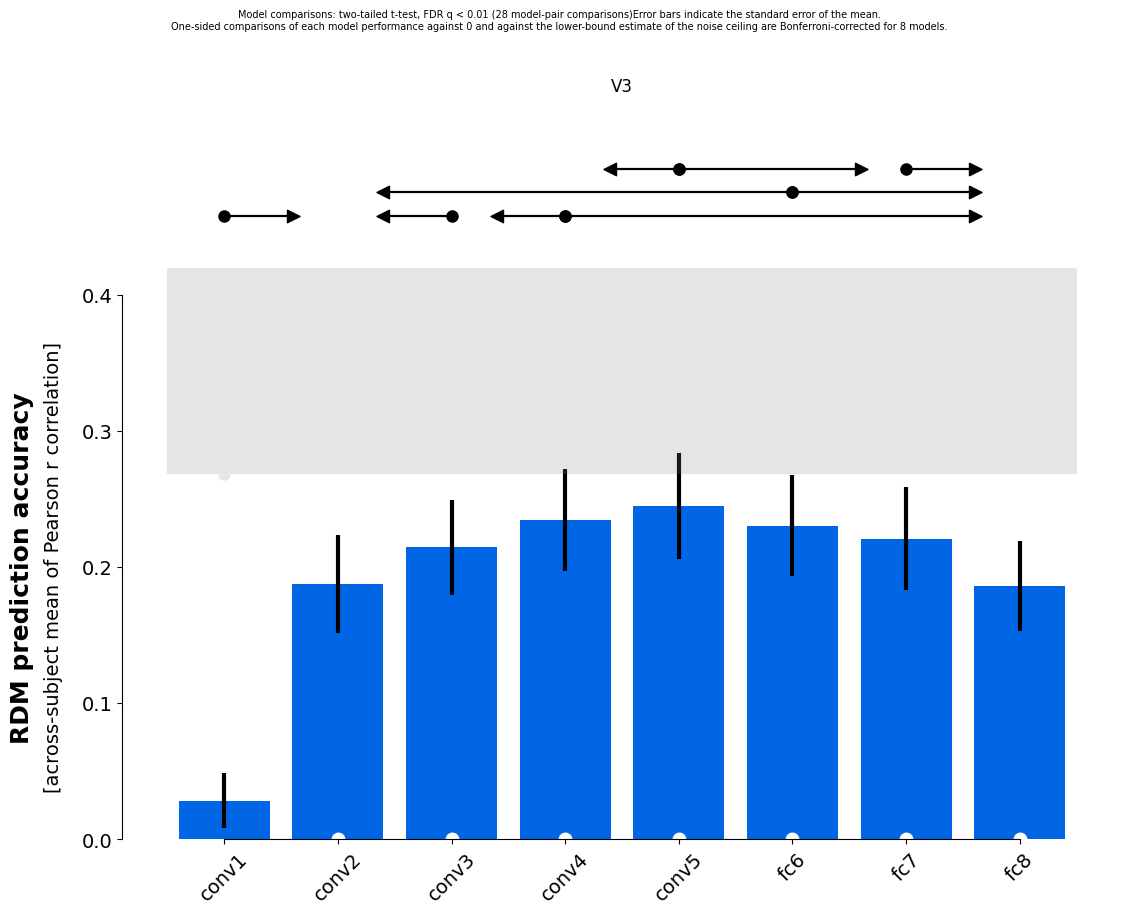

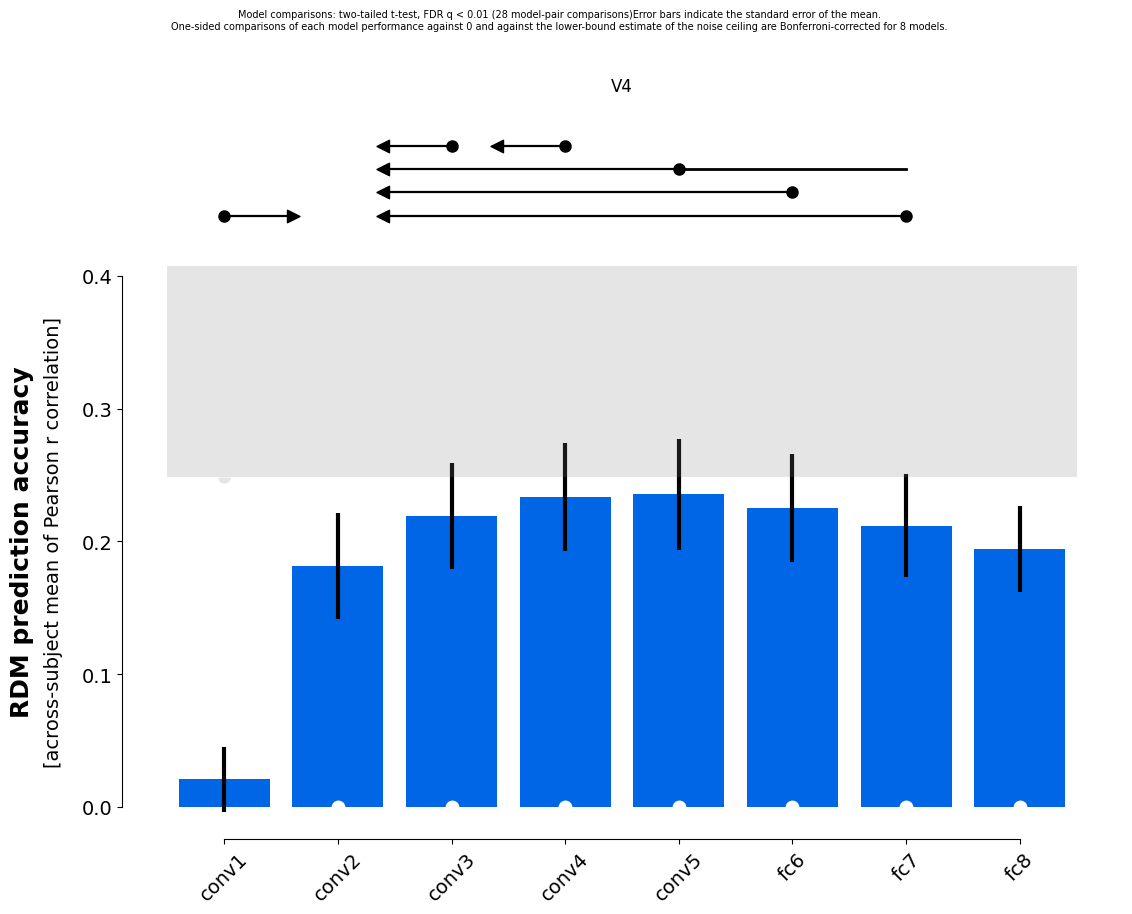

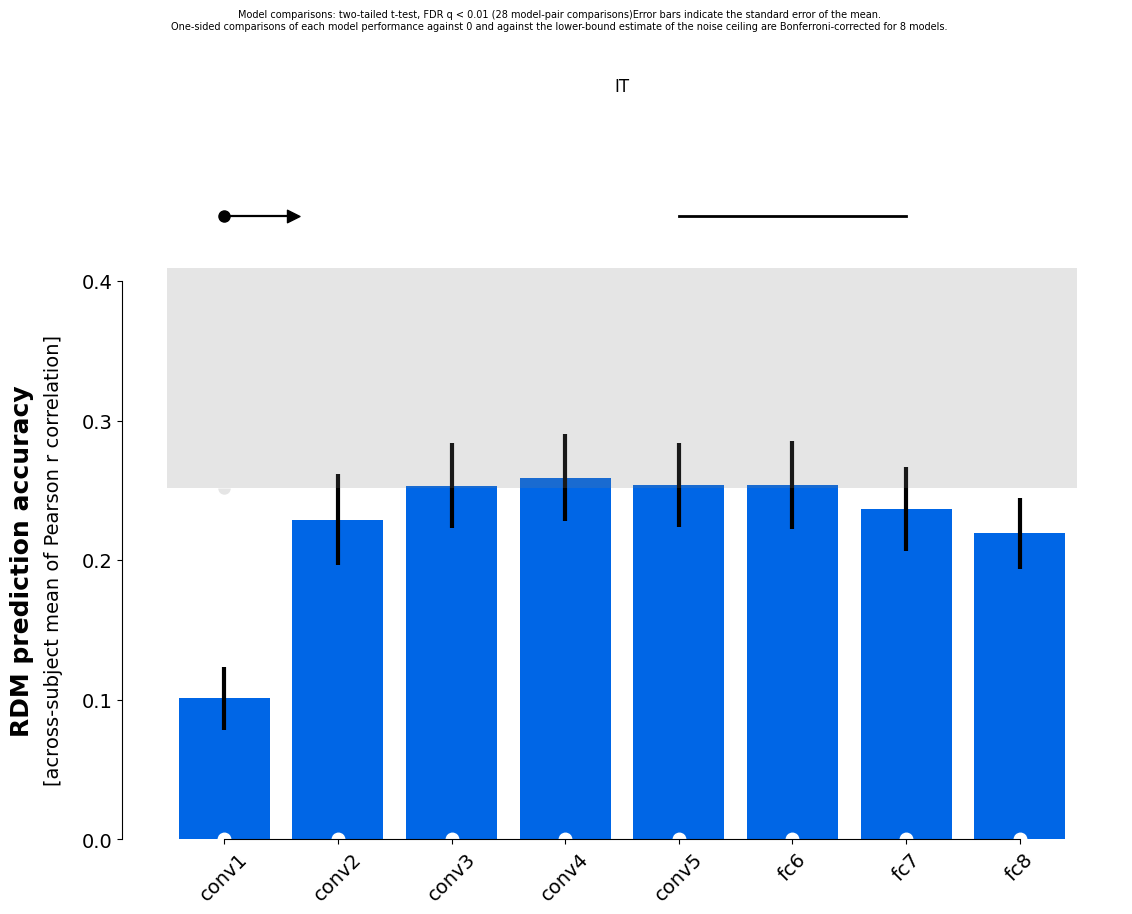

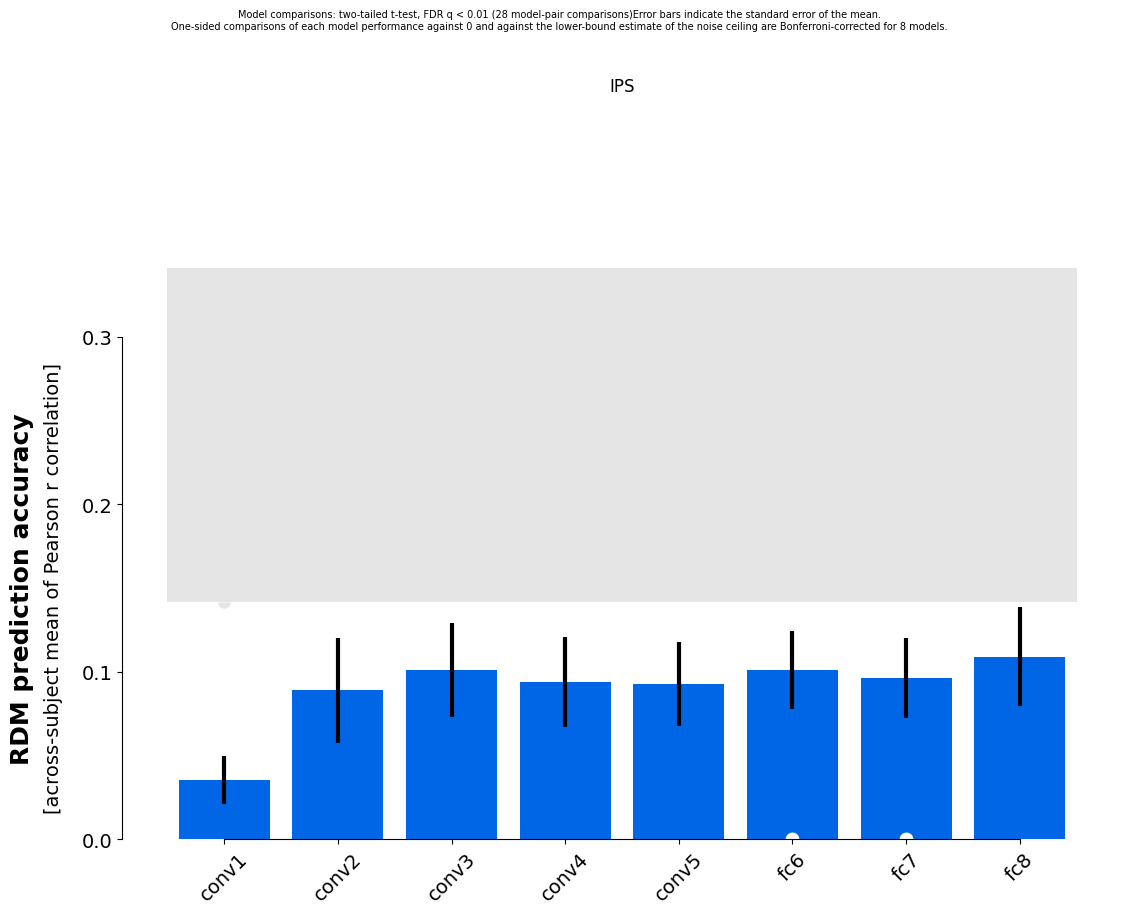

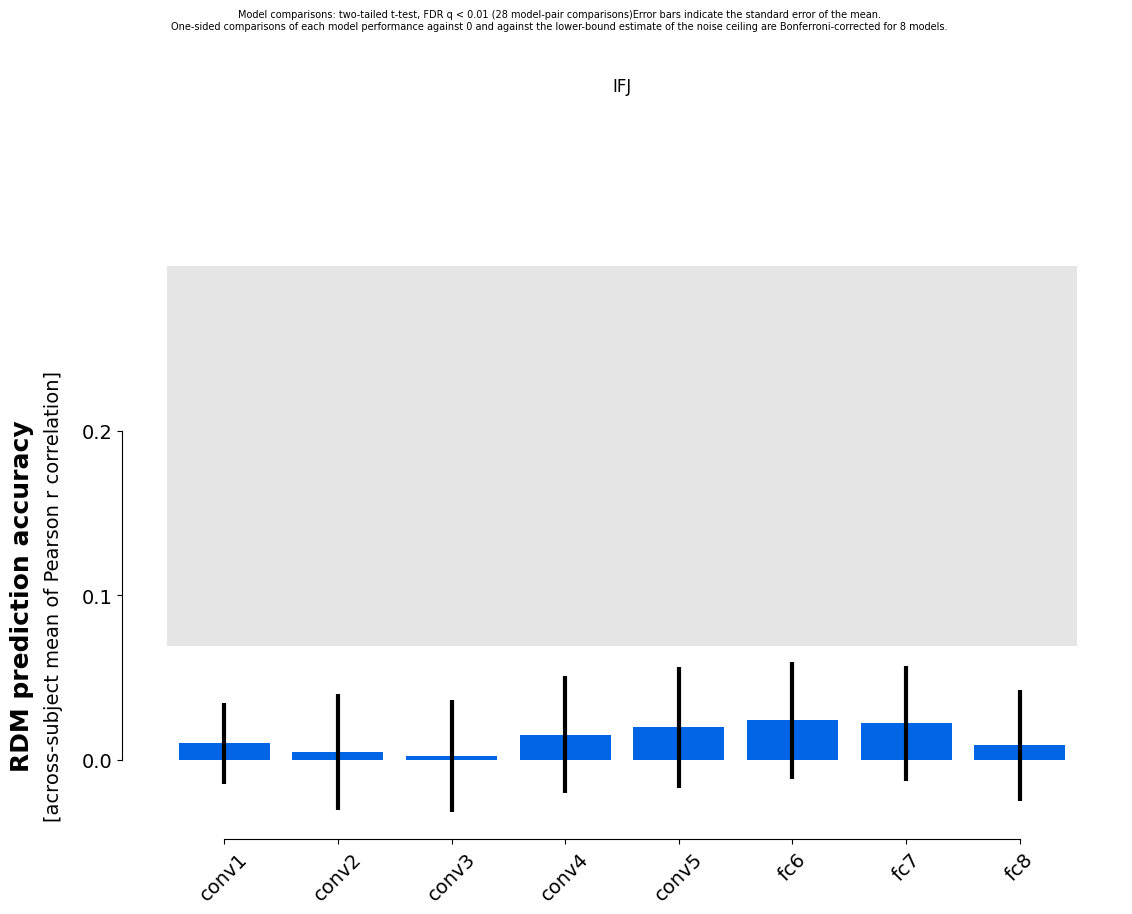

In [36]:
for roiI in np.arange(n_ROIs):
    dataRDMs = rsa.rdm.rdms.RDMs(RDMs_neural['RDMs_subj_region'][:, roiI, :, :].squeeze())
        
    results = rsa.inference.eval_fixed(models, dataRDMs, method='corr')
    rsa.vis.plot_model_comparison(results)
    
    plt.title(ROI_names[roiI])